# Introduction
***

Welcome to my retail customer segmentation project! We are going to analyze the data from the customers of a retail company, and try to understand the behaviour of their customers. Hopefully, we'll find lot of insights to help the company on how to plan their next campaigns, who would be the target of a new product, what are the most important customers, etc.

 It contains information of 2240 customers, with 29 attributes each. These attributes are: 
 
**People**
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

## Imports
***

In [25]:
### Imports
import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score 
from sklearn.cluster import KMeans

%matplotlib inline

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
## Reading the data
df = pd.read_csv("/content/drive/MyDrive/Indika_Project_Data/marketing_campaign.csv",sep = '\t')
df.head(5)



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [28]:
# Finding the number of unique values present in each column

df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [29]:
#In above cell "Z_CostContact" and "Z_Revenue" have same value in all the rows that's why 
#they are not going to contribute anything in the model building. So we can drop them.
 #Dropping columns because they will not contribute anything in model building

df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [30]:
## Renaming columns
df.columns = ['customer_id','year_birth', 'education','marital_status','income', 'kid_home','teen_home','dt_customer','recency', 'mnt_wines', 'mnt_fruits','mnt_meat', 'mnt_fish','mtn_sweet','mnt_gold','num_deals_purchases','num_web_purchases','num_catalog_purchases','num_store_purchases','num_web_visits_month','accepted_cpm3','accepted_cpm4', 'accepted_cpm5', 'accepted_cpm1', 'accepted_cpm2', 'complain','response']

## Basic info of the dataset
display(df.head(10))
display(df.shape)

,customer_id,year_birth,education,marital_status,income,kid_home,teen_home,dt_customer,recency,mnt_wines,...,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cpm3,accepted_cpm4,accepted_cpm5,accepted_cpm1,accepted_cpm2,complain,response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,4,10,6,0,0,0,0,0,0,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,3,7,6,0,0,0,0,0,0,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,0,4,8,0,0,0,0,0,0,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,0,2,9,0,0,0,0,0,0,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,0,0,20,1,0,0,0,0,0,0


(2240, 27)

## Cleaning Data 

In [31]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            2240 non-null   int64  
 1   year_birth             2240 non-null   int64  
 2   education              2240 non-null   object 
 3   marital_status         2240 non-null   object 
 4   income                 2216 non-null   float64
 5   kid_home               2240 non-null   int64  
 6   teen_home              2240 non-null   int64  
 7   dt_customer            2240 non-null   object 
 8   recency                2240 non-null   int64  
 9   mnt_wines              2240 non-null   int64  
 10  mnt_fruits             2240 non-null   int64  
 11  mnt_meat               2240 non-null   int64  
 12  mnt_fish               2240 non-null   int64  
 13  mtn_sweet              2240 non-null   int64  
 14  mnt_gold               2240 non-null   int64  
 15  num_

,customer_id,year_birth,income,kid_home,teen_home,recency,mnt_wines,mnt_fruits,mnt_meat,mnt_fish,...,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cpm3,accepted_cpm4,accepted_cpm5,accepted_cpm1,accepted_cpm2,complain,response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
display(df.head(10))

,customer_id,year_birth,education,marital_status,income,kid_home,teen_home,dt_customer,recency,mnt_wines,...,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cpm3,accepted_cpm4,accepted_cpm5,accepted_cpm1,accepted_cpm2,complain,response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,4,10,6,0,0,0,0,0,0,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,3,7,6,0,0,0,0,0,0,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,0,4,8,0,0,0,0,0,0,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,0,2,9,0,0,0,0,0,0,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,0,0,20,1,0,0,0,0,0,0


In [33]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


customer_id               0.039832
year_birth               -0.349944
income                    6.763487
kid_home                  0.635288
teen_home                 0.407115
recency                  -0.001987
mnt_wines                 1.175771
mnt_fruits                2.102063
mnt_meat                  2.083233
mnt_fish                  1.919769
mtn_sweet                 2.136081
mnt_gold                  1.886106
num_deals_purchases       2.418569
num_web_purchases         1.382794
num_catalog_purchases     1.880989
num_store_purchases       0.702237
num_web_visits_month      0.207926
accepted_cpm3             3.291705
accepted_cpm4             3.241574
accepted_cpm5             3.291705
accepted_cpm1             3.555444
accepted_cpm2             8.472093
complain                 10.188972
response                  1.971555
dtype: float64

customer_id               0
year_birth                0
education                 0
marital_status            0
income                   24
kid_home                  0
teen_home                 0
dt_customer               0
recency                   0
mnt_wines                 0
mnt_fruits                0
mnt_meat                  0
mnt_fish                  0
mtn_sweet                 0
mnt_gold                  0
num_deals_purchases       0
num_web_purchases         0
num_catalog_purchases     0
num_store_purchases       0
num_web_visits_month      0
accepted_cpm3             0
accepted_cpm4             0
accepted_cpm5             0
accepted_cpm1             0
accepted_cpm2             0
complain                  0
response                  0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


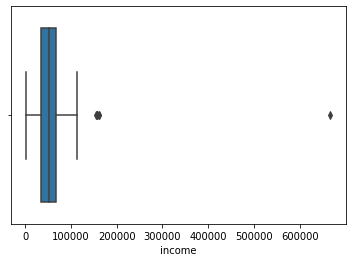

In [34]:
## Fill null values with the median
display(df.isnull().sum())
# Box Plot
import seaborn as sns
sns.boxplot(df['income'])

#as the income variable has outiler null values of this variable are replaced with median

In [35]:
df = df.fillna(df['income'].median())

In [36]:
df.info()
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            2240 non-null   int64  
 1   year_birth             2240 non-null   int64  
 2   education              2240 non-null   object 
 3   marital_status         2240 non-null   object 
 4   income                 2240 non-null   float64
 5   kid_home               2240 non-null   int64  
 6   teen_home              2240 non-null   int64  
 7   dt_customer            2240 non-null   object 
 8   recency                2240 non-null   int64  
 9   mnt_wines              2240 non-null   int64  
 10  mnt_fruits             2240 non-null   int64  
 11  mnt_meat               2240 non-null   int64  
 12  mnt_fish               2240 non-null   int64  
 13  mtn_sweet              2240 non-null   int64  
 14  mnt_gold               2240 non-null   int64  
 15  num_

customer_id              0
year_birth               0
education                0
marital_status           0
income                   0
kid_home                 0
teen_home                0
dt_customer              0
recency                  0
mnt_wines                0
mnt_fruits               0
mnt_meat                 0
mnt_fish                 0
mtn_sweet                0
mnt_gold                 0
num_deals_purchases      0
num_web_purchases        0
num_catalog_purchases    0
num_store_purchases      0
num_web_visits_month     0
accepted_cpm3            0
accepted_cpm4            0
accepted_cpm5            0
accepted_cpm1            0
accepted_cpm2            0
complain                 0
response                 0
dtype: int64


# **Feature Engineering**

We have created new features to the dataset, remove outliers, clean nulls, and change some categorical data.




In [37]:
# Feature engineering: Creating new, useful features

# Create a feature with the total spent for the client
df['total_spent'] = df['mnt_wines']  + df['mnt_fruits'] + df['mnt_meat'] + df['mnt_fish'] + df['mtn_sweet'] + df['mnt_gold']

# Create a feature with the % of money spent on essential item (food-related) 
df['pct_essentials'] = (df['mnt_fruits'] + df['mnt_meat'] + df['mnt_fish'] + df['mtn_sweet'])/df['total_spent']

# Create a feature with the number of purchases for each client
df['num_purchases'] = df['num_web_purchases']+df['num_catalog_purchases'] + df['num_store_purchases']+df['num_web_visits_month']

# Create a feature with the number of children
df['num_children'] = df['kid_home'] + df['teen_home']


# Create a feature with the percentage of purchases made with a discount
df['pct_purchases_with_discount'] = df['num_deals_purchases'] / df['num_purchases']
df['pct_purchases_with_discount'].fillna(0, inplace=True)

# Create a feature with the age of the client, and another with the number of days since he's enrolled with the company
df['dt_customer'] = pd.to_datetime(df['dt_customer'])

df['days_since_enrollment'] = ((datetime.now() - df['dt_customer']).dt.days)

df['age'] =  2015 - df['year_birth']

In [38]:
df['num_children']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: num_children, Length: 2240, dtype: int64

In [39]:
df['days_since_enrollment']

0       3715
1       2869
2       3216
3       2809
4       3065
        ... 
2235    3285
2236    2805
2237    3059
2238    3060
2239    3526
Name: days_since_enrollment, Length: 2240, dtype: int64

In [40]:
# Group some categories that have a similar meaning 
df['relationship'] = df['marital_status'].replace({'Married':1,'Together':1,
                            'Single':0, 'Divorced':0, 'Widow':0, 'Alone':0, 'Absurd':0,'YOLO':0})

df["education"] = df["education"].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 
                                           'Graduation':'Graduated', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


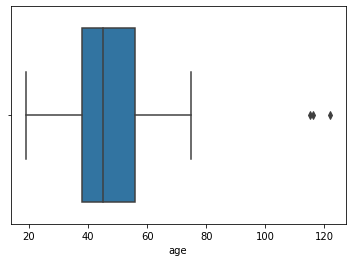

In [41]:
# Box Plot
import seaborn as sns
sns.boxplot(df['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


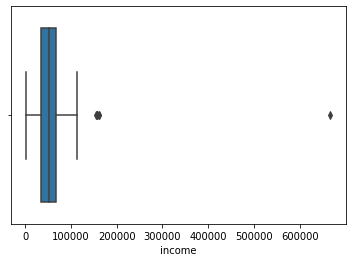

In [42]:
# Box Plot
import seaborn as sns
sns.boxplot(df['income'])

In [43]:
## Removing outliers
df = df[(df['age'] < 90) & (df['income'] < 200000)].reset_index(drop = True)

print("The new dataset have {} rows.".format(df.shape[0]))
#as from the boxplot we can see above age above 90 and income greater than 200000 are outlier we are removing those


The new dataset have 2236 rows.


In [44]:
df[df['num_purchases'] == 0]


,customer_id,year_birth,education,marital_status,income,kid_home,teen_home,dt_customer,recency,mnt_wines,...,complain,response,total_spent,pct_essentials,num_purchases,num_children,pct_purchases_with_discount,days_since_enrollment,age,relationship
652,5555,1975,Graduated,Divorced,153924.0,0,0,2014-07-02,81,1,...,0,0,6,0.666667,0,0,0.0,2901,40,0
2129,11181,1949,Postgraduate,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,8,0.625000,0,0,0.0,3208,66,1


In [45]:
## Since there are just 2 values with 0 purchases and both of them with a low total spent, we'll replace the 0's with 1's.
df.loc[(df['num_purchases'] == 0,'num_purchases')]=1

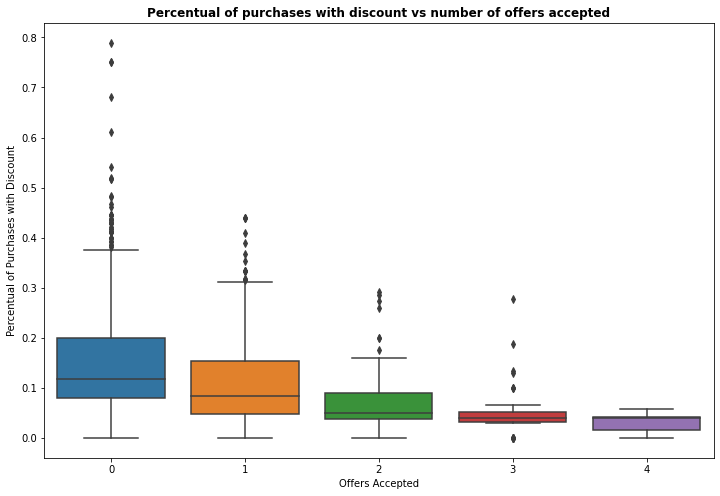

In [46]:
## Let's check the relationship between the "offers accepted", and the "percentual of purchases with discount"
df['accepted_sum'] = df['accepted_cpm3']+df['accepted_cpm4']+ df['accepted_cpm5'] + df['accepted_cpm1'] +df['accepted_cpm2']
plt.figure(figsize = (12,8))
plt.title('Percentual of purchases with discount vs number of offers accepted', fontweight = 'bold')
sns.boxplot(data = df, x = 'accepted_sum', y = 'pct_purchases_with_discount')
plt.xlabel('Offers Accepted')
plt.ylabel('Percentual of Purchases with Discount');

That's really not what we expected: they have an opposite correlation, which doesn't make sense. I'm not going to use these "accepted~" features, because of this incongruence, and because it's not really clear how they work: The description is: "1 if customer accepted the offer in the nst campaign, 0 otherwise". But what happens if the customer didn't receive all the offers (only received 3 of them, for example)? How can we garantee that he saw that offers? What if he received more than 5 offers? Since this features are confusing, I'll not use them, and use the "pct_purchases_with_discount" instead, that will give a similar idea, in a more straightfoward way.

In [47]:
df.corr()

,customer_id,year_birth,income,kid_home,teen_home,recency,mnt_wines,mnt_fruits,mnt_meat,mnt_fish,...,response,total_spent,pct_essentials,num_purchases,num_children,pct_purchases_with_discount,days_since_enrollment,age,relationship,accepted_sum
customer_id,1.000000,0.002659,0.000869,0.001656,-0.003052,-0.046300,-0.020726,0.007247,-0.002274,-0.022903,...,-0.021596,-0.015359,0.016379,-0.017934,-0.001024,-0.027304,-0.004006,-0.002659,0.020460,-0.035621
year_birth,0.002659,1.000000,-0.198835,0.233894,-0.363172,-0.019396,-0.162809,-0.013657,-0.030729,-0.042359,...,0.018557,-0.113618,0.240809,-0.146953,-0.095512,-0.012031,0.022940,-1.000000,-0.001355,0.000164
income,0.000869,-0.198835,1.000000,-0.510441,0.034315,0.007829,0.686080,0.504911,0.684176,0.518462,...,0.161121,0.789375,-0.057808,0.574094,-0.340550,-0.386168,-0.027775,0.198835,-0.004738,0.364481
kid_home,0.001656,0.233894,-0.510441,1.000000,-0.035339,0.007964,-0.496166,-0.372442,-0.436901,-0.387404,...,-0.080005,-0.556719,0.031964,-0.460598,0.690256,0.462492,-0.056752,-0.233894,0.023632,-0.211511
teen_home,-0.003052,-0.363172,0.034315,-0.035339,1.000000,0.016746,0.005047,-0.176117,-0.261171,-0.204177,...,-0.154941,-0.138197,-0.477946,0.091414,0.698721,0.374244,0.007686,0.363172,0.031456,-0.127660
recency,-0.046300,-0.019396,0.007829,0.007964,0.016746,1.000000,0.016321,-0.003717,0.023446,0.001314,...,-0.198781,0.020842,0.018398,-0.000867,0.017826,0.005724,0.030134,0.019396,-0.003573,-0.012394
mnt_wines,-0.020726,-0.162809,0.686080,-0.496166,0.005047,0.016321,1.000000,0.388472,0.561886,0.398956,...,0.247280,0.891696,-0.287646,0.713750,-0.351522,-0.306640,0.147480,0.162809,-0.007237,0.511880
mnt_fruits,0.007247,-0.013657,0.504911,-0.372442,-0.176117,-0.003717,0.388472,1.000000,0.542030,0.594415,...,0.125854,0.613122,0.301407,0.418878,-0.394121,-0.320134,0.059440,0.013657,-0.026118,0.159744
mnt_meat,-0.002274,-0.030729,0.684176,-0.436901,-0.261171,0.023446,0.561886,0.542030,1.000000,0.567813,...,0.236548,0.842624,0.314137,0.486094,-0.501844,-0.352065,0.072983,0.030729,-0.020880,0.308521
mnt_fish,-0.022903,-0.042359,0.518462,-0.387404,-0.204177,0.001314,0.398956,0.594415,0.567813,1.000000,...,0.111325,0.642335,0.325981,0.426157,-0.425148,-0.330090,0.077199,0.042359,-0.018050,0.177102


In [49]:
### Droping columns: Since we are going to use perform clusterization ahead, it's important that we only keep the 
### most important features, since we don't want the clusters to be created based on attributes that 
### are not that important to us



df = df.drop(['num_web_visits_month','recency', 'complain', 'response', 'customer_id','dt_customer',
              'year_birth','kid_home','teen_home','mnt_wines', 'mnt_fruits','mnt_meat', 'mnt_fish', 
              'mtn_sweet', 'mnt_gold', 'num_web_purchases', 'num_catalog_purchases', 'num_store_purchases',
              'accepted_cpm3','accepted_cpm4', 'accepted_cpm5', 'accepted_cpm1',
              'accepted_cpm2', 'marital_status', 'accepted_sum'], axis = 1)


In [50]:
df.head(5)

,education,income,num_deals_purchases,total_spent,pct_essentials,num_purchases,num_children,pct_purchases_with_discount,days_since_enrollment,age,relationship
0,Graduated,58138.0,3,1617,0.552876,29,0,0.103448,3715,58,0
1,Graduated,46344.0,2,27,0.370370,9,2,0.222222,2869,61,0
2,Graduated,71613.0,1,776,0.396907,24,0,0.041667,3216,50,1
3,Graduated,26646.0,2,53,0.698113,12,1,0.166667,2809,31,1
4,Postgraduate,58293.0,5,422,0.554502,19,1,0.263158,3065,34,1


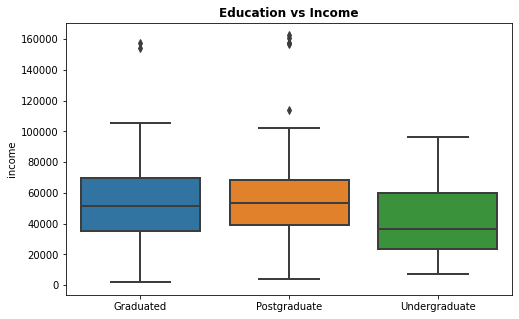

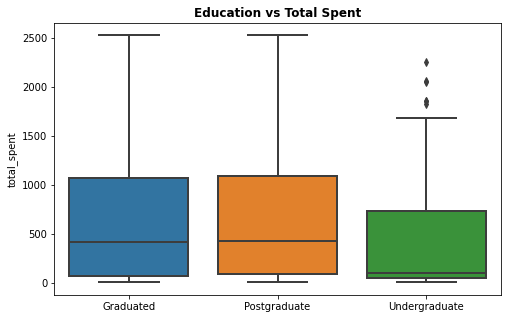

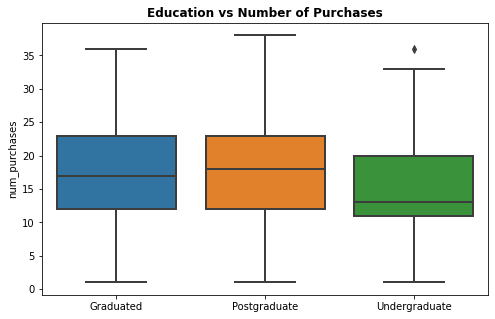

In [51]:
## Purchase behaviour vs Education
plt.figure(figsize = (8,5))
plt.title("Education vs Income", fontweight = 'bold', fontsize = 12)
sns.boxplot(y = df['income'] , x = df['education'], linewidth = 2)
plt.xlabel("")
plt.show()

plt.figure(figsize = (8,5))
plt.title("Education vs Total Spent", fontweight = 'bold', fontsize = 12)
sns.boxplot(y = df['total_spent'] , x = df['education'], linewidth = 2)
plt.xlabel("")
plt.show()

plt.figure(figsize = (8,5))
plt.title("Education vs Number of Purchases", fontweight = 'bold', fontsize = 12)
sns.boxplot(y = df['num_purchases'] , x = df['education'], linewidth = 2)
plt.xlabel("")
plt.show()

Looking at the purchase behaviour, it's fair to say that graduates and postgraduates have a very similar behaviour. Therefore, we'll put them in the same category.

In [52]:
df["education"] = df["education"].replace({'Graduated':'Postgraduate'})
df['education'] = df['education'].replace({"Postgraduate": 1})
df['education'] = df['education'].replace({"Undergraduate": 0})
df.rename(columns={'education': 'high_education'}, inplace = True)

## Exploratory Data Analysis
***

Let's take a closer look at our remaining features, their distributions, and how they relate to each other.

In [53]:
import plotly.express as px
import plotly.graph_objects as go

In [54]:
df['relationship'].value_counts()

1    1442
0     794
Name: relationship, dtype: int64

In [55]:
maritalstatus = df.relationship.value_counts()

fig = px.pie(maritalstatus, 
             values = maritalstatus.values, 
             names = maritalstatus.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 4)))
fig.show() 

**Insight**: 64.5% customers are in relationship
         35.5% are single

In [56]:
# Some descriptive statistics
df.describe()

,high_education,income,num_deals_purchases,total_spent,pct_essentials,num_purchases,num_children,pct_purchases_with_discount,days_since_enrollment,age,relationship
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,0.885957,51952.614043,2.326029,605.986583,0.421153,17.866279,0.950805,0.136283,3256.179785,46.101968,0.644902
std,0.317935,21411.466851,1.933032,601.865156,0.194116,6.547265,0.752204,0.094970,232.311073,11.703281,0.478650
min,0.000000,1730.000000,0.000000,5.000000,0.027523,1.000000,0.000000,0.000000,2744.000000,19.000000,0.000000
25%,1.000000,35502.500000,1.000000,69.000000,0.263047,12.000000,0.000000,0.066667,3084.750000,38.000000,0.000000
50%,1.000000,51381.500000,2.000000,396.500000,0.428571,17.000000,1.000000,0.111111,3257.000000,45.000000,1.000000
75%,1.000000,68275.750000,3.000000,1045.500000,0.570302,23.000000,1.000000,0.181818,3430.000000,56.000000,1.000000
max,1.000000,162397.000000,15.000000,2525.000000,0.998844,38.000000,3.000000,0.789474,3807.000000,75.000000,1.000000


In [57]:
## We'll create an auxiliar column, to help us with the visualization. It will be deleted afterwards.
df['age_group'] = df['age']//10*10

cat_columns = ['high_education','num_children', 'relationship', 'age_group']
num_columns = ['income', 'num_deals_purchases','total_spent','num_purchases', 
       'pct_purchases_with_discount', 'days_since_enrollment', 'pct_essentials']

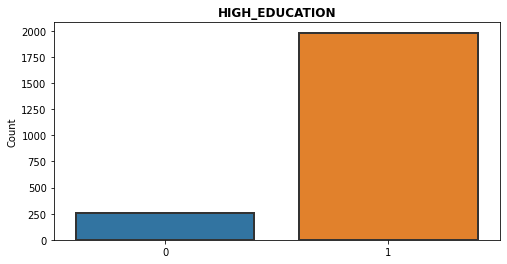

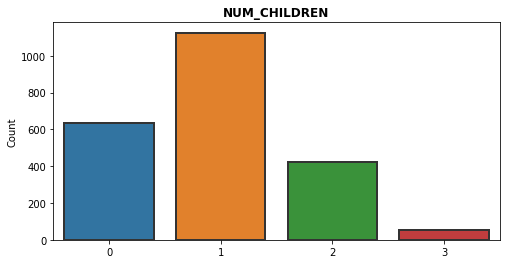

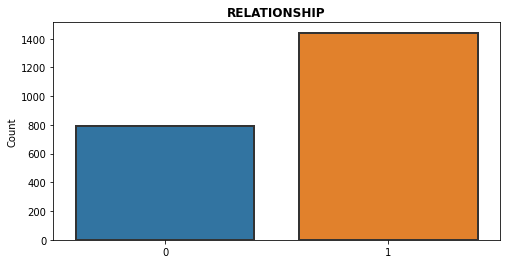

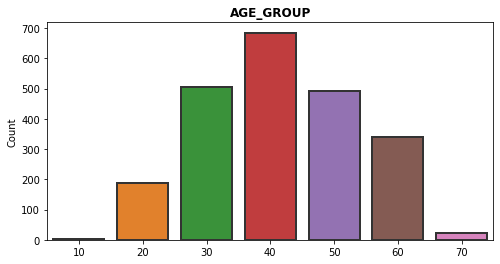

In [58]:
'''Categorical distributions (even though num_children and age_group are numerical variables,
for practical effects it makes a lot of sense to make their visualization as categorical)
'''

for cat in cat_columns:
    plt.figure(figsize = (8,4))
    plt.title(str.upper(cat), fontweight = 'bold')
    aux = df.groupby(cat).size().reset_index()#.rename({'pct_essentials':'count'}, axis = 1)
    ax = sns.barplot(x=cat, data=aux, y = 0, linewidth=2, edgecolor=".2").set(ylabel="Count", xlabel = None)
    
    plt.show()

**INSIGHT**
Most of our customers:
- Are in a relationship
- Have a high_education (graduated or more)
- Have 1 children
- Are between 30~60 years

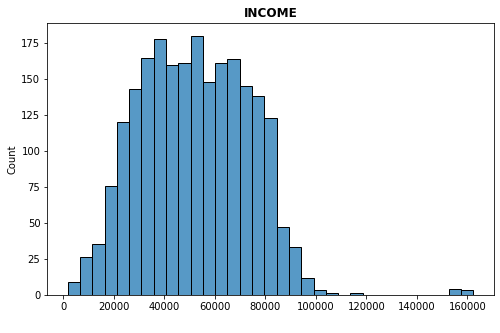

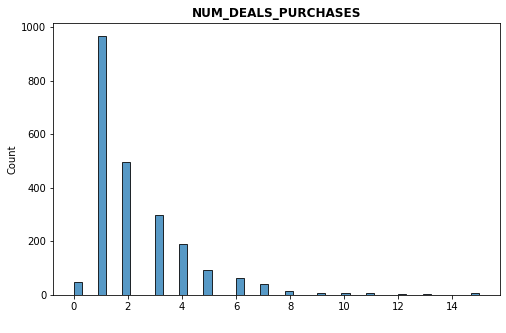

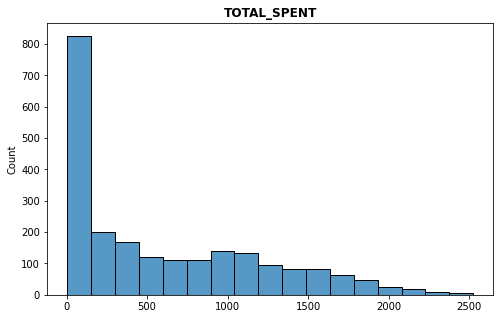

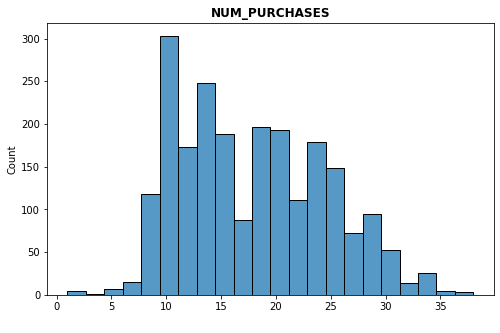

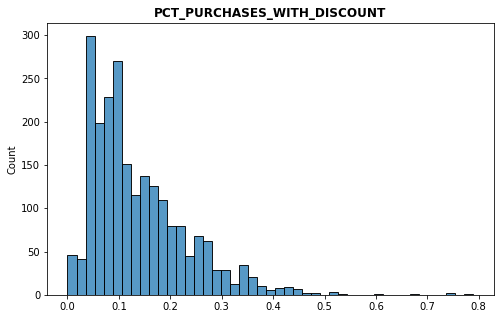

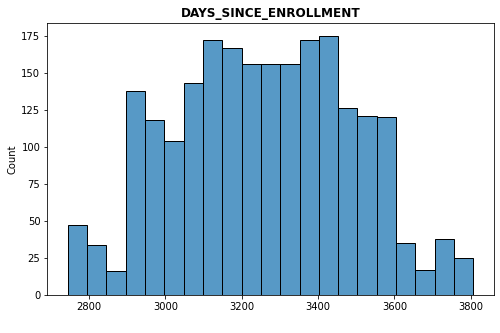

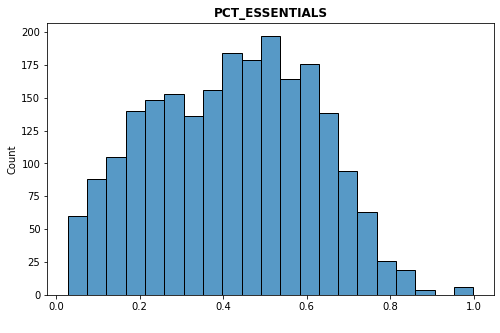

In [59]:
## Distribution of numerical variable

for num in num_columns:
    plt.figure(figsize = (8,5))
    plt.title(str.upper(num), fontweight = 'bold')
    ax = sns.histplot(x=num, data=df)
    ax.set_xlabel(" ")
    plt.show()

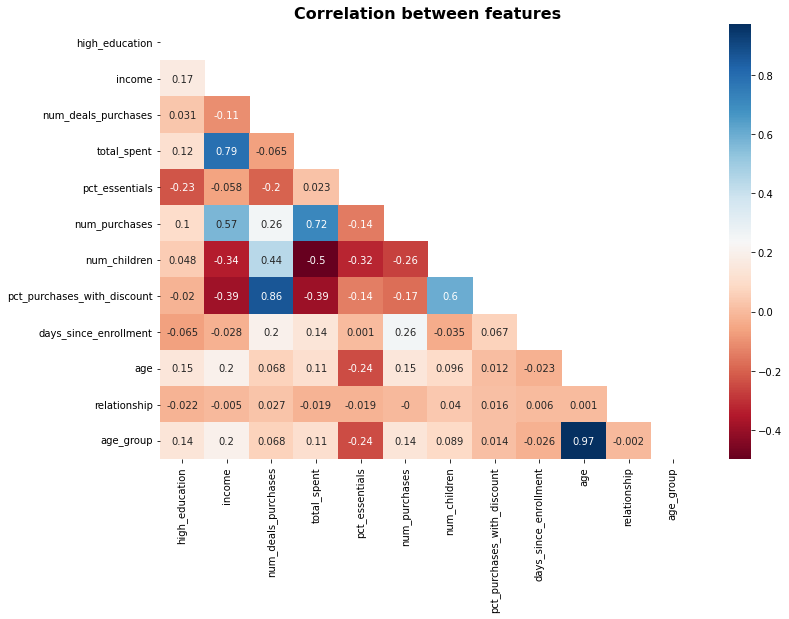

In [60]:
## Correlation Matrix
corr= df.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

fig = plt.figure(figsize=(12,8))
plt.title('Correlation between features', fontsize = 16, fontweight = 'bold')
sns.heatmap(round(df.corr(),3), annot=True, cmap="RdBu", mask = matrix);

**INSIGHT**
Based on the correlation matrix, we can see a lot of variables that have a strong relationship. Let's take a closer look:

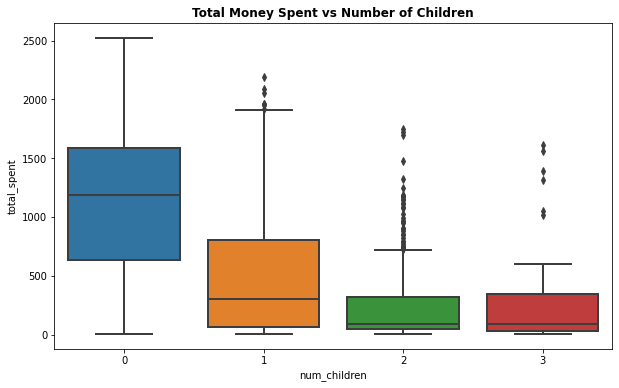

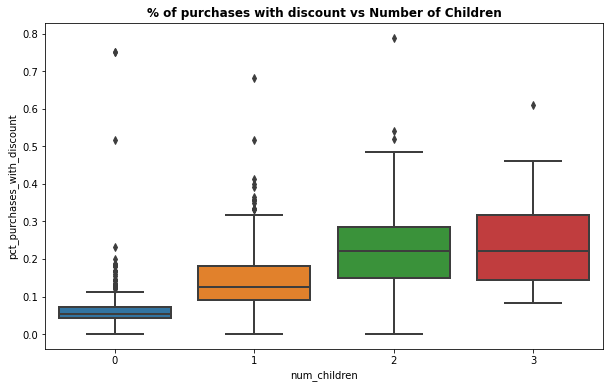

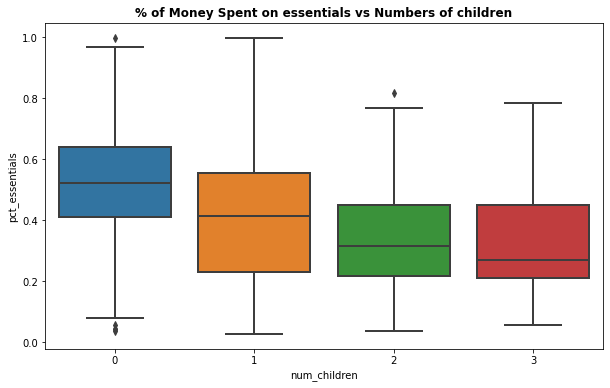

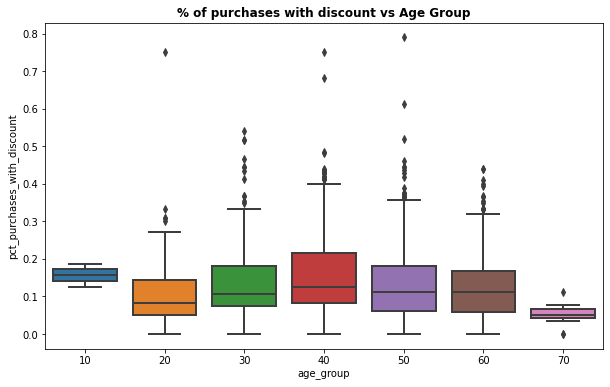

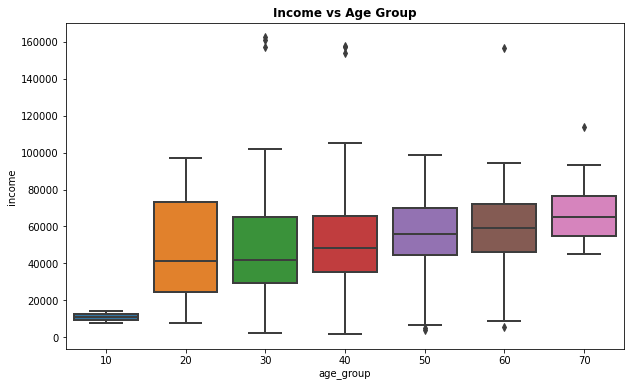

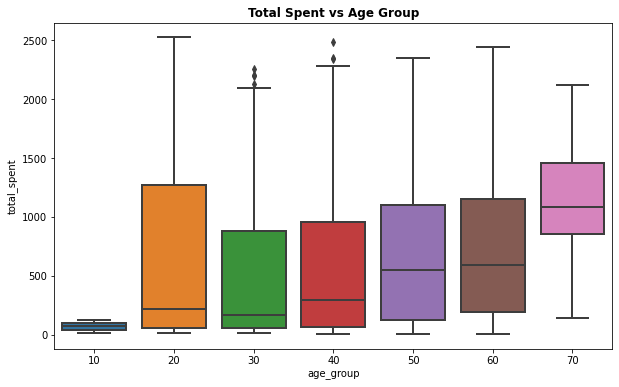

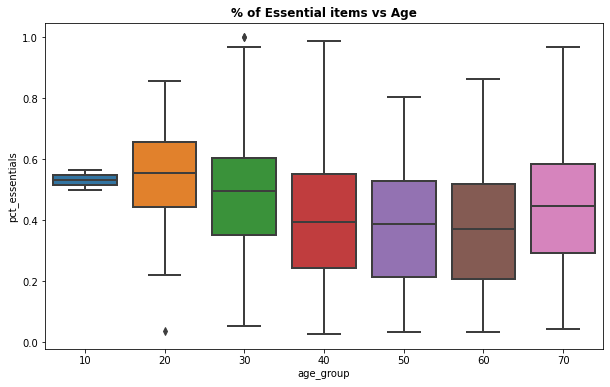

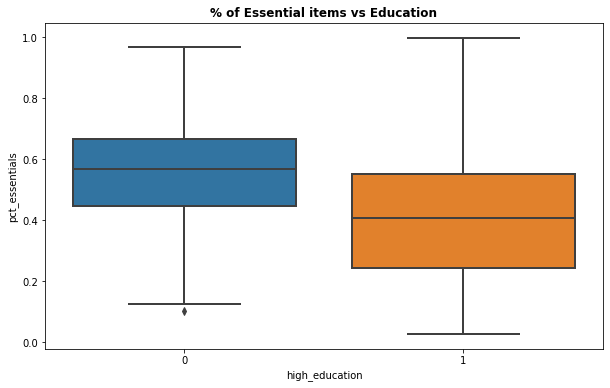

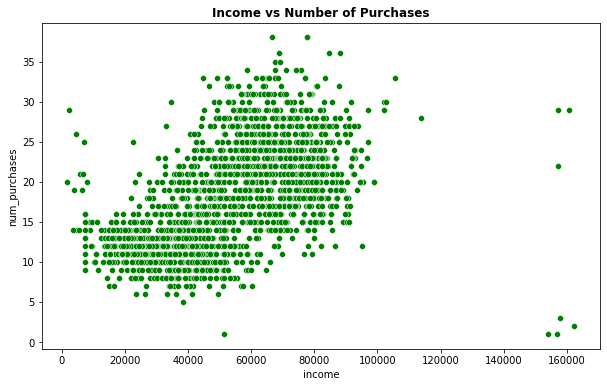

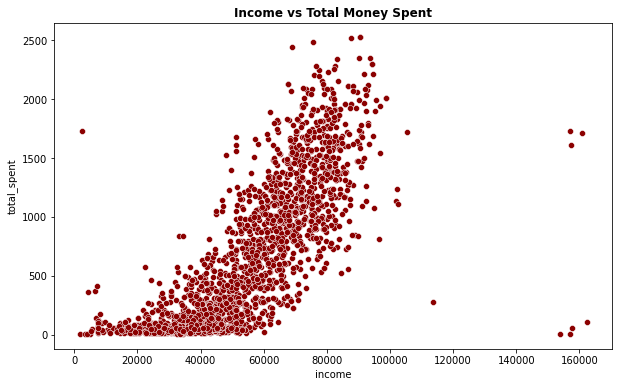

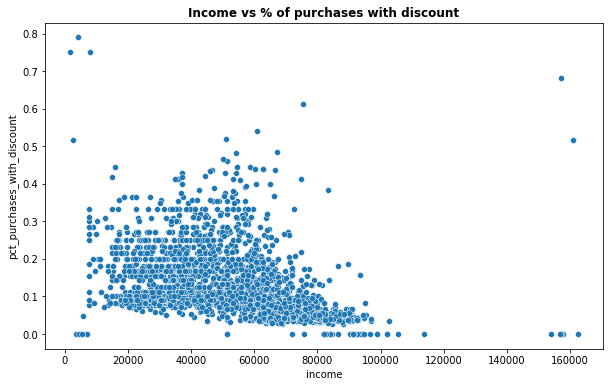

In [61]:
plt.figure(figsize = (10,6))
plt.title("Total Money Spent vs Number of Children", fontweight = 'bold')
sns.boxplot(data = df, y = 'total_spent', x = 'num_children', linewidth = 2)# interessante
plt.show()

plt.figure(figsize = (10,6))
plt.title("% of purchases with discount vs Number of Children", fontweight = 'bold')
sns.boxplot(data = df, y = 'pct_purchases_with_discount', x = 'num_children', linewidth = 2)
plt.show()

plt.figure(figsize = (10,6))
plt.title("% of Money Spent on essentials vs Numbers of children", fontweight = 'bold')
sns.boxplot(data = df, y = 'pct_essentials', x = 'num_children', linewidth = 2) ### esquisito
plt.show()


plt.figure(figsize = (10,6))
plt.title("% of purchases with discount vs Age Group", fontweight = 'bold')
sns.boxplot(data = df, y = 'pct_purchases_with_discount', x = 'age_group', linewidth = 2)
plt.show()

plt.figure(figsize = (10,6))
plt.title("Income vs Age Group", fontweight = 'bold')
sns.boxplot(data = df, y = 'income', x = 'age_group', linewidth = 2)
plt.show()


plt.figure(figsize = (10,6))
plt.title("Total Spent vs Age Group", fontweight = 'bold')
sns.boxplot(data = df, y = 'total_spent', x = 'age_group', linewidth = 2)
plt.show()

plt.figure(figsize = (10,6))
plt.title("% of Essential items vs Age", fontweight = 'bold')
sns.boxplot(data = df, y = 'pct_essentials', x = 'age_group', linewidth = 2)# interessante
plt.show()

plt.figure(figsize = (10,6))
plt.title("% of Essential items vs Education", fontweight = 'bold')
sns.boxplot(data = df, y = 'pct_essentials', x = 'high_education', linewidth = 2)# interessante
plt.show()

plt.figure(figsize = (10,6))
plt.title("Income vs Number of Purchases", fontweight = 'bold')
sns.scatterplot(data = df, x = 'income', y = 'num_purchases', color = 'green')
plt.show()

plt.figure(figsize = (10,6))
plt.title("Income vs Total Money Spent", fontweight = 'bold')
sns.scatterplot(data = df, x = 'income', y = 'total_spent', color = 'darkred')
plt.show()

plt.figure(figsize = (10,6))
plt.title("Income vs % of purchases with discount", fontweight = 'bold')
sns.scatterplot(data = df, x = 'income', y = 'pct_purchases_with_discount')
plt.show()


df = df.drop(['age_group', 'days_since_enrollment'], axis = 1)

**INSIGHT**
From the visualizations, we can see some things:

- People with no children: are less inclined to wait for discounts to buy their items and spend more money on essential items (fruits, fish, meat, sweet).

- Older people have a higher income
- People with higher income spend more money, and are less inclined to wait for discounts to buy their items.




**That is good to know:** We can see that people with no children at home spend more money, and buy lots of items at full price! These customers are the most valuable to the company!

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   high_education               2236 non-null   int64  
 1   income                       2236 non-null   float64
 2   num_deals_purchases          2236 non-null   int64  
 3   total_spent                  2236 non-null   int64  
 4   pct_essentials               2236 non-null   float64
 5   num_purchases                2236 non-null   int64  
 6   num_children                 2236 non-null   int64  
 7   pct_purchases_with_discount  2236 non-null   float64
 8   age                          2236 non-null   int64  
 9   relationship                 2236 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 174.8 KB


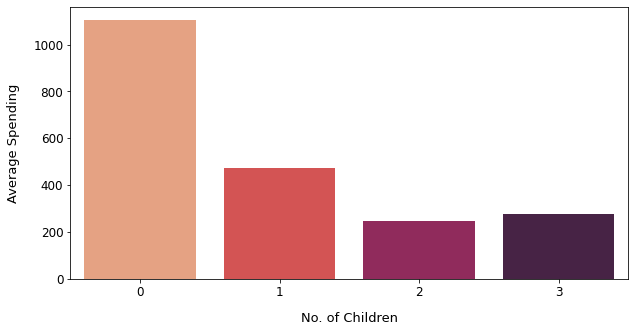

In [64]:
childrenspending = df.groupby('num_children')['total_spent'].mean().sort_values(ascending=False)
childrenspending_df = pd.DataFrame(list(childrenspending.items()), columns=['No. of Children', 'Average Spending'])

plt.figure(figsize=(10,5))

sns.barplot(data=childrenspending_df,  x="No. of Children", y="Average Spending", palette='rocket_r');
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('No. of Children', fontsize=13, labelpad=13)
plt.ylabel('Average Spending', fontsize=13, labelpad=13);

**INSIGHT**

Customers who do not have children at home spend more than customers who have 1 child.
Customers who have 1 child spend higher than customers who have 2 and 3 children.

# Clustering

Now we are going to start with our clustering! We are going to use the K-Means to segmentate our clusters. There are some steps we are going to take first: 1) scaling our data and perform a 2) dimensionality reduction technique.
# Scaling the Data
Now we need to scale our data. Both the PCA and the K-Means algorithms require the features to be in the same dimension since their operation involves calculating distances between customers: If one feature had a wider range than the others, it would have a bigger impact on the decision of the algorithm, and we don’t want that.

Luckily, the Standard Scaler method from sklearn makes this transformation easy! All the original values will have a similar range (mostly from -2 to 2). The new dataset (transposet) looks like this:




In [79]:
### Standardization
sc = StandardScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df), columns = df.columns)
display(df_scaled[:6].T)


,0,1,2,3,4,5
high_education,0.358780,0.358780,0.358780,0.358780,0.358780,0.358780
income,0.288947,-0.262003,0.918423,-1.182183,0.296187,0.493322
num_deals_purchases,0.348738,-0.168700,-0.686137,-0.168700,1.383614,-0.168700
total_spent,1.680176,-0.962202,0.282541,-0.918994,-0.305762,0.182828
pct_essentials,0.678727,-0.261669,-0.124932,1.427092,0.687108,-0.860312
num_purchases,1.700895,-1.354499,0.937047,-0.896190,0.173198,1.242586
num_children,-1.264308,1.395139,-1.264308,0.065416,0.065416,0.065416
pct_purchases_with_discount,-0.345812,0.905113,-0.996495,0.320003,1.336247,-0.625175
age,1.016868,1.273264,0.333146,-1.290693,-1.034298,0.162216
relationship,-1.347635,-1.347635,0.742041,0.742041,0.742041,0.742041


### Principal Components Analysis (PCA)


In our dataset, we have a high number of features and a lot of them have a certain level of correlation between each other, and are somewhat redundant. Performing a dimensionality reduction technique is a good option to reduce the number of features, decreasing the computation cost of the algorithm, while maintaining a good amount of information from the original dataset. 

This step is not mandatory, and is not really clear whether to use PCA before clustering really gives us better results. That is particularly tricky, since clustering is a non-supervisioned algorithm, which makes it harder to assess its performance. 

Now, performing the PCA, we need to determine how many principal components we'll need to maintain about 70%~80% of variance of the original data. 

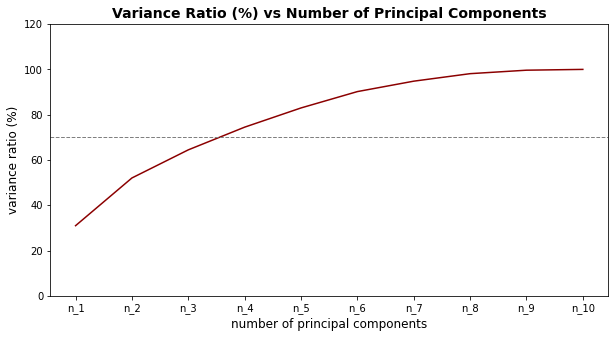

In [88]:
## Determining the number of principal components

variance_ratio = {}
for i in range(1, len(df_scaled.columns)+1):
    pca = PCA(n_components=i)
    pca.fit(df_scaled)
    variance_ratio[f'n_{i}'] = pca.explained_variance_ratio_.sum()*100
    
plt.figure(figsize = (10, 5))
plt.plot(list(variance_ratio.keys()), list(variance_ratio.values()), color = 'darkred')
plt.axhline(70, color = 'gray', ls = '--', lw = 1)
plt.title("Variance Ratio (%) vs Number of Principal Components", fontsize = 14, fontweight = 'bold')
plt.ylabel("variance ratio (%)", fontsize = 12)
plt.xlabel("number of principal components", fontsize = 12)
plt.ylim([0, 120])
plt.show()

**INSIGHT**

With 4 principal components, we have almost 70% of the variance explained. That's a good result.

In [90]:
## Applying PCA to create a new dataset with 4 Princpal Components.

pca = PCA(n_components = 4, random_state = 123)
pca.fit(df_scaled)
df_pca = pd.DataFrame(pca.transform(df_scaled),
                      columns = (["PC1", "PC2", "PC3", "PC4"]))
df_pca.head(10)

,PC1,PC2,PC3,PC4
0,-2.274534,1.038782,0.657311,1.394884
1,1.873772,0.221562,-1.444355,1.300307
2,-2.033061,-0.038860,-0.403020,-0.784877
3,1.362169,-1.679132,0.632138,-0.542794
4,0.935675,0.760746,1.514094,-0.494165
5,-0.979687,0.880995,-0.501349,-0.799601
6,0.002919,0.681003,0.827445,1.465414
7,0.839552,-0.916139,0.079233,-0.639917
8,0.577954,-1.760793,-0.250290,-0.674554
9,1.236696,0.175955,-2.292278,-0.920205


Now we have a new dataset with the 4 principal components. In the next step, we are going to apply the k-means on this new dataset.

## K-Means

We are going to use the k-means algorithm to create our clusters. First, we'll need to determine the ideal number of clusters. We are going to to that by comparing two techniques: the elbow method and the silhouette score. 

In the elbow method, we plot the WCSS vs the number of clusters. The WCSS is the sum of squared distance between each point and the centroid in a cluster. Naturally, as we increase the number of clusters, this value will always get smaller. 

What we are looking for is a value of N that, from that point forward, the decrease of WCSS won't be very significative.

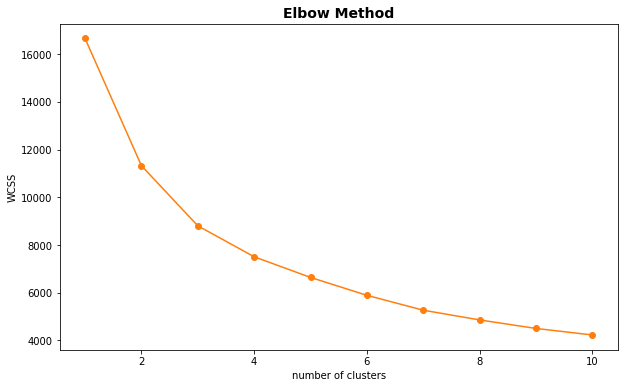

In [91]:
## Determining the ideal number of clusters: Elbow method
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=123)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker='o', color = 'tab:orange')
plt.title('Elbow Method', fontsize = 14, fontweight = 'bold')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

Taking a look at the curve, it's not really clear what is the ideal number of clusters. Let's double check it with the silhouette scores. From wikipedia: *The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).*

The silhouette coefficient is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation).

Select a range of values of k (say 1 to 10).
Plot Silhouette coefﬁcient for each value of K.
The equation for calculating the silhouette coefﬁcient for a particular data point:

*silhouette score *

s(i)=b(i)-a(i)/max{a(i),b(i)}

S(i) is the silhouette coefficient of the data point i.
a(i) is the average distance between i and all the other data points in the cluster to which i belongs.
b(i) is the average distance from i to all clusters to which i does not belong.

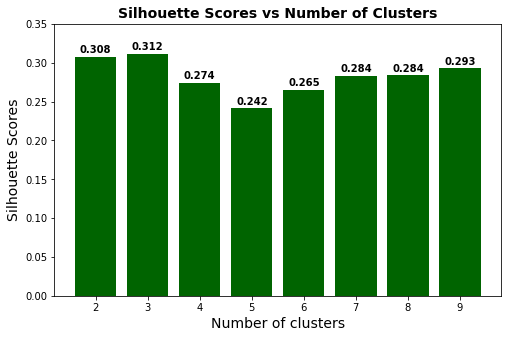

In [92]:
silhouette_scores = []

for i in range(2,10):
    m1 = KMeans(n_clusters=i, random_state=123)
    c = m1.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, m1.fit_predict(df_pca)))

plt.figure(figsize = (8,5))
plt.bar(range(2,10), silhouette_scores, color = 'darkgreen')
plt.title("Silhouette Scores vs Number of Clusters", fontsize = 14, fontweight = 'bold')
plt.xlabel('Number of clusters', fontsize = 14) 
plt.ylabel('Silhouette Scores', fontsize = 14)
plt.ylim(0,0.35)
for a, b in enumerate(silhouette_scores):
    plt.text(a + 1.7, b + 0.005, str(round(b,3)), color='black', fontweight='bold')
plt.show()

That settles: We are going to use the K-Means with 3 clusters, and add the results to the original dataset.

In [93]:
kmeans = KMeans(n_clusters=3, random_state=123).fit(df_pca)
pred = kmeans.predict(df_pca)
df['cluster'] = pred + 1
df.head()

,high_education,income,num_deals_purchases,total_spent,pct_essentials,num_purchases,num_children,pct_purchases_with_discount,age,relationship,cluster
0,1,58138.0,3,1617,0.552876,29,0,0.103448,58,0,2
1,1,46344.0,2,27,0.370370,9,2,0.222222,61,0,1
2,1,71613.0,1,776,0.396907,24,0,0.041667,50,1,2
3,1,26646.0,2,53,0.698113,12,1,0.166667,31,1,1
4,1,58293.0,5,422,0.554502,19,1,0.263158,34,1,3


## Analyzing the clusters

Now, let's compare the clusters:

*Number of Customers per Cluster*

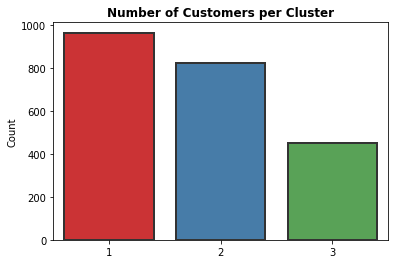

In [94]:
aux = df.cluster.value_counts()/len(df.count())
plt.title('Number of Customers per Cluster', fontweight = 'bold')
aux = df.groupby('cluster').size().reset_index()#.rename({'pct_essentials':'count'}, axis = 1)
ax = sns.barplot(x='cluster', data=aux, y = 0, linewidth=2, edgecolor=".2",  palette = 'Set1').set(ylabel="Count", xlabel = None)

**Insight**

Cluster 1 has maximum customers then 2,3






In [114]:
df['cluster'].value_counts()/sum(df['cluster'].value_counts())*100

1    43.067979
2    36.762075
3    20.169946
Name: cluster, dtype: float64

In [95]:
# Creating an auxiliar dataset to help the evaluation
clusters_evaluation = df.groupby('cluster').mean().T
clusters_evaluation['mean_dataset'] = df.mean().T
clusters_evaluation

cluster,1,2,3,mean_dataset
high_education,0.827622,0.928224,0.933481,0.885957
income,34993.984424,72417.336375,50864.273836,51952.614043
num_deals_purchases,1.711319,1.457421,5.221729,2.326029
total_spent,108.835929,1224.389294,540.419069,605.986583
pct_essentials,0.454990,0.445566,0.304409,0.421153
num_purchases,12.330218,22.885645,20.538803,17.866279
num_children,1.131880,0.401460,1.565410,0.950805
pct_purchases_with_discount,0.139721,0.063851,0.260956,0.136283
age,42.856698,47.878345,49.793792,46.101968
relationship,0.651090,0.620438,0.676275,0.644902


In [96]:
plt.figure(figsize = (8,8))
clusters_evaluation.drop('mean_dataset', axis = 1).style.background_gradient(cmap='RdYlGn',axis=1)

cluster,1,2,3
high_education,0.827622,0.928224,0.933481
income,34993.984424,72417.336375,50864.273836
num_deals_purchases,1.711319,1.457421,5.221729
total_spent,108.835929,1224.389294,540.419069
pct_essentials,0.454990,0.445566,0.304409
num_purchases,12.330218,22.885645,20.538803
num_children,1.131880,0.401460,1.565410
pct_purchases_with_discount,0.139721,0.063851,0.260956
age,42.856698,47.878345,49.793792
relationship,0.651090,0.620438,0.676275


<Figure size 576x576 with 0 Axes>

From the chart and the plots above, we can have a good idea of the differences between the clusters.

The clusters 1 and 2 have most of our data, and the 3 is considerably smaller, but still holds a relevant percentage of our customers.

At first glance, we can see that the income is very important to divide the users: In cluster 2, we have a lot of customers with high income, in cluster 1 we have people with lower-income, and the 3, medium income.

Before stating our conclusions, let’s see how different the variables are among clusters, in a more visual way.

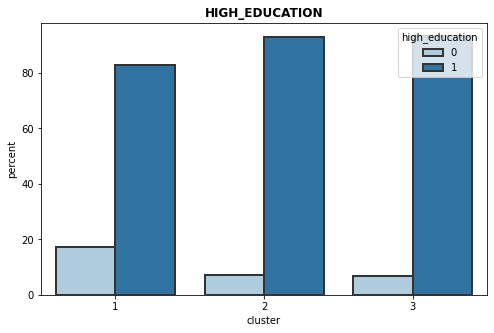

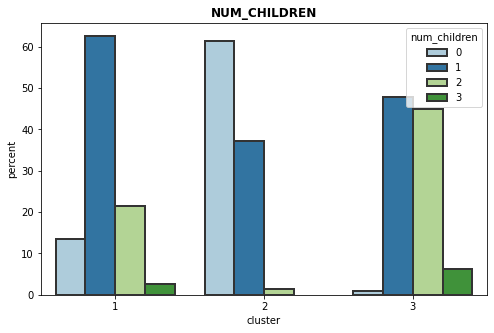

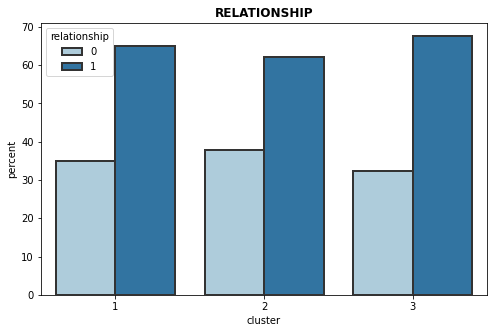

In [97]:
## Categorical Visualizations

cat_columns = ['high_education','num_children', 'relationship']
num_columns = ['income','total_spent','num_purchases', 
       'pct_purchases_with_discount', 'age', 'pct_essentials']

for cat in cat_columns:
    plt.figure(figsize = (8,5))
    plt.title(str.upper(cat), fontweight = 'bold')
    df_aux = df.groupby('cluster')[cat].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    sns.barplot(data = df_aux, x='cluster',y='percent',hue=cat, palette = 'Paired',linewidth=2, edgecolor=".2");
    plt.show()    

**Insights:**

- cluster 2 has least higher educated people and 0 or 1 children hardly 3 child
- Pretty much everyone of the cluster 1 have maximum 1 children.
- Pretty much everyone of the cluster 3 have 1 or 2 children

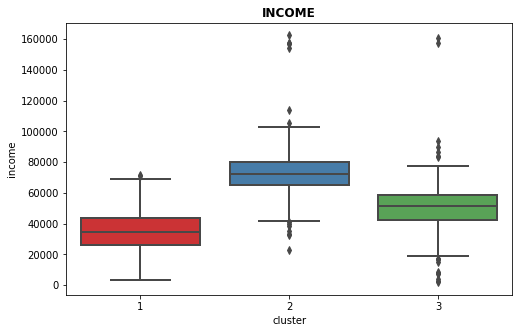

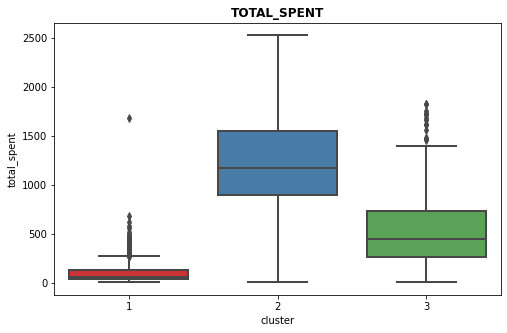

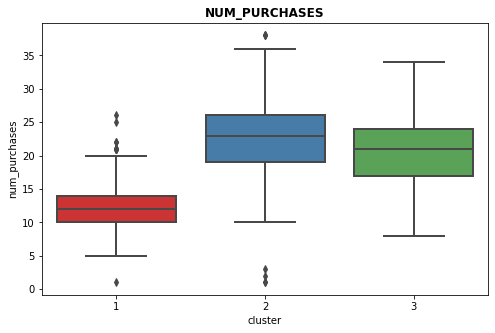

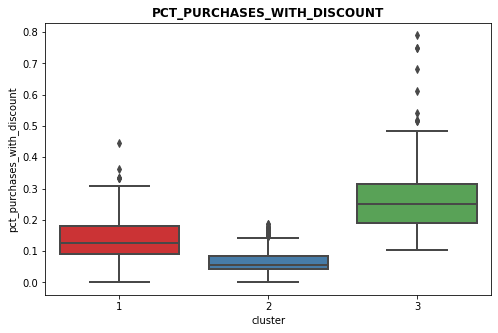

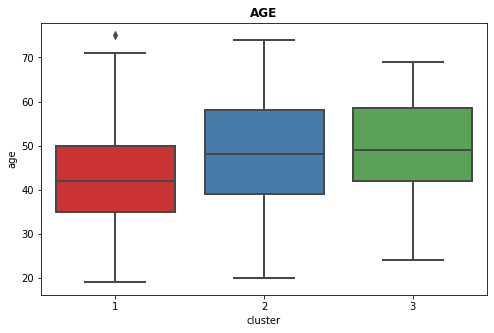

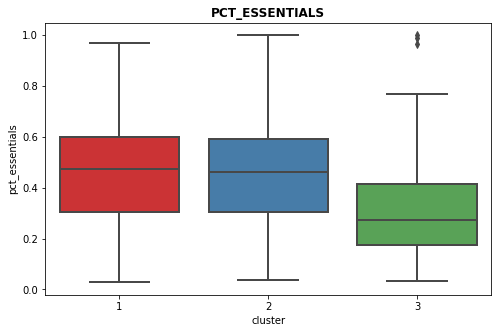

In [98]:
## Numerical Variables

for num in num_columns:
    plt.figure(figsize = (8,5))
    plt.title(str.upper(num), fontweight = 'bold')
    ax = sns.boxplot(y=num, x = 'cluster', data=df, palette = 'Set1', linewidth = 2)#.set(ylabel="Count", xlabel = None)
    plt.show()

#### Notes:

##### <ins>Income:<ins>
- Cluster2: High Income 
- Cluster1: Low Income
- Cluster3: Medium Income

#### <ins>Total Spent:<ins> 
- Cluster2: high spent
- Cluster1: low spent
- Cluster3: medium spent

#### <ins>Percentage of Items bought with discount:<ins>
- Cluster3: Buys a lot of items with discount
- Cluster2: Buys a lot of items without discount

#### <ins>Percentage of essential items bought:<ins>
- Cluster3: Buys a lot of non-essential items (wine + gold)

#### <ins>Age:<ins>
- Cluster1: Are considerably younger than the rest 


    
Other important visualizations:

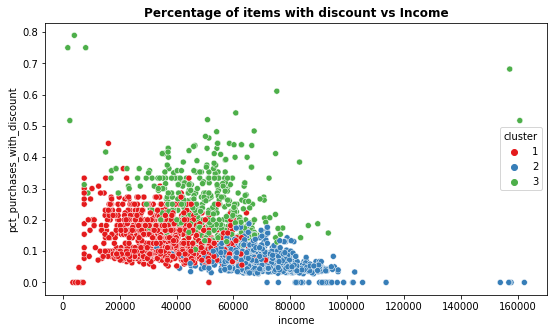

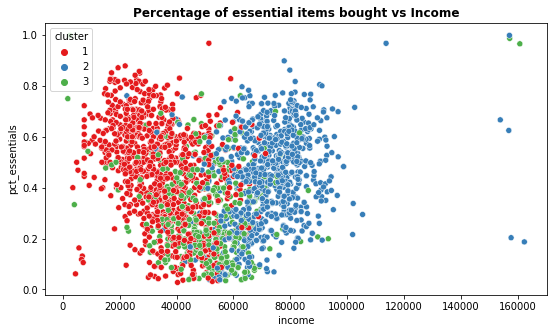

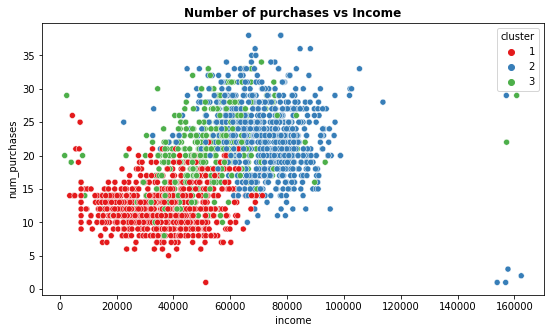

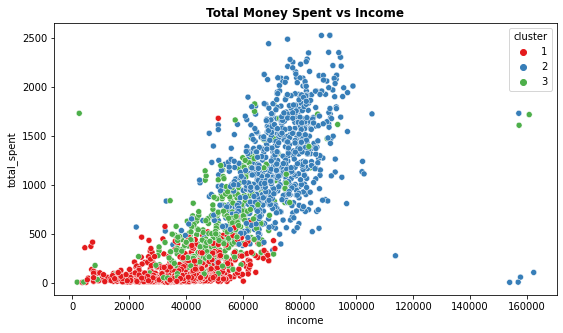

In [101]:
plt.figure(figsize = (9,5))
plt.title('Percentage of items with discount vs Income', fontweight = 'bold')
sns.scatterplot(data = df, x = 'income', y = 'pct_purchases_with_discount', hue = 'cluster', palette = 'Set1')
plt.show()

plt.figure(figsize = (9,5))
plt.title('Percentage of essential items bought vs Income', fontweight = 'bold')
sns.scatterplot(data = df, x = 'income', y = 'pct_essentials', hue = 'cluster', palette = 'Set1')
plt.show()

plt.figure(figsize = (9,5))
plt.title('Number of purchases vs Income', fontweight = 'bold')
sns.scatterplot(data = df, x = 'income', y = 'num_purchases', hue = 'cluster', palette = 'Set1')
plt.show()

plt.figure(figsize = (9,5))
plt.title('Total Money Spent vs Income', fontweight = 'bold')
sns.scatterplot(data = df, x = 'income', y = 'total_spent', hue = 'cluster', palette = 'Set1')
plt.show()

## Conclusions:
***


### Cluster 2:


- About 36% of the customers
- High income group
- Almost everybody have 0 or 1 children.
- Spend a lot of money
- Don't buy a lot of things with discount


### Cluster 1:

- Bigger cluster (about 44%)
- Smaller income group
- Don't spend a lot of money
- Contains most of the people without a high-education
- Is a little younger than the average of the dataset

### Cluster 3:

- Smaller part of the customers (about 20%)
- Medium income group
- Everyone have at least 1 children
- Are very sensitive to items with discount
- Usually buys non-essential items (wine + gold)


From this clusters, we are a step closer to understand our customers behaviour. The more actionable information is that relation between the customers and the % of items bought with discount:

- We could see that people in the cluster 3 buys a lot of non-essential items, and are very sensitive to discount. 
- On the other hand, people in the cluster 2 doesn't respond very well to discounts.

Therefore, it **might be a good idea to concentrate efforts to send special offers to the people in the cluster 3 (and don't send to cluster 1).**

From these clusters, we are a step closer to understanding our customers’ behaviour.

**The most important conclusions are:**

***1)People from cluster 2 buy items at full price, and spend a lot of money. Therefore, they are our most valuable customers. The company should make an extra effort to keep them happy.***

***2)People in cluster 3 buy a lot of non-essential items, and are very sensitive to discounts.***

***3)On the other hand, people in cluster 1 don’t respond very well to discounts. Therefore, it might be a good idea to concentrate efforts to send special offers to the people in cluster 3 (and don’t send so much to cluster 2).***

---

